In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
correlation = df.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE   
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311  \
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0.298773  0.591944  0.014102  0.628170 -0.236057  0.443585   
TAX      0.560841 -0.305768  0.734204 -0.026513  0.679824 -0.320561  0.504472   
PTRATIO  0.265428 -0.422164  0.395691 -0.104995  0.210216 -0.390686  0.264968   
B       -0.386254  0.169894 

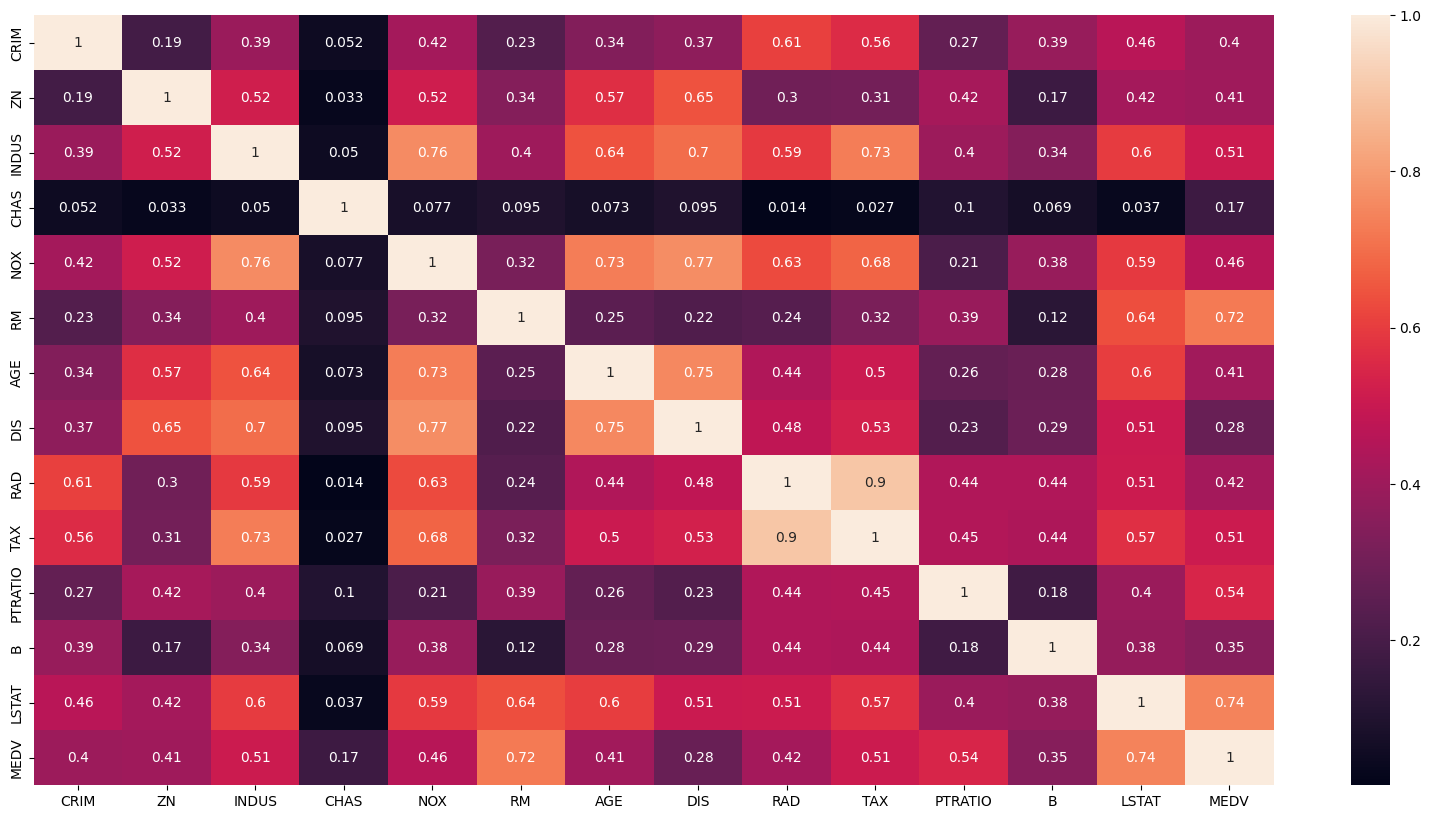

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(correlation.abs(), annot=True)
plt.show()

In [12]:
X = df[['LSTAT', 'RM']]
Y = df['MEDV']

In [13]:
print(X)

     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
5     5.21  6.430
..     ...    ...
499  15.10  5.569
500  14.33  6.027
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794

[394 rows x 2 columns]


In [14]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=False)

In [16]:
print(x_train)

     LSTAT     RM
280   3.76  7.820
318  10.36  6.382
105  16.47  5.851
217   9.69  6.642
25   16.51  5.599
..     ...    ...
415  29.05  6.434
248   9.52  6.433
141  34.41  5.019
57    3.95  6.816
218  17.92  5.951

[295 rows x 2 columns]


In [17]:
print(y_train)

280    45.4
318    23.1
105    19.5
217    28.7
25     13.9
       ... 
415     7.2
248    24.5
141    14.4
57     31.6
218    21.5
Name: MEDV, Length: 295, dtype: float64


In [18]:
print(x_test)

     LSTAT     RM
136  16.90  5.942
360   7.79  6.398
81    7.22  6.619
195   2.97  7.875
421  15.70  6.006
..     ...    ...
395  17.12  6.471
356  17.60  6.212
96   11.34  6.163
443  18.85  6.485
122  17.93  5.961

[99 rows x 2 columns]


In [19]:
print(y_test)

136    17.4
360    25.0
81     23.9
195    50.0
421    14.2
       ... 
395    13.1
356    17.8
96     21.4
443    15.4
122    20.5
Name: MEDV, Length: 99, dtype: float64


In [22]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = linear_model.predict(x_test)

In [24]:
print(y_test)

136    17.4
360    25.0
81     23.9
195    50.0
421    14.2
       ... 
395    13.1
356    17.8
96     21.4
443    15.4
122    20.5
Name: MEDV, Length: 99, dtype: float64


In [25]:
print(y_pred)

[18.08190627 25.74271815 27.36176951 37.11351461 19.11431075 21.88705744
 28.2284365  21.83885794 27.20311089 12.96038227 29.78180156 12.50442116
 23.71752387 28.80099475 18.02459589 31.21109381 23.33472923 30.5959255
 23.47255701 20.02406272 21.88283567 30.48212234 22.16041346 19.59995506
 19.47865372 22.83615656 17.31740363 13.23754077 20.42496786 22.86453821
  9.30793199 19.03318015 21.25583314 25.29982066 16.6115084  10.98446362
 26.66336047 16.85327699 22.03306274  9.14521848 25.14381624 12.0294628
 25.49571479 22.3961793  28.62103185 13.56139432 21.79979633 20.10294941
 13.8637497  15.49170905 23.27946135 22.82799104 13.62210588 32.40467285
 16.14512436 17.08863253 17.65718541 23.43913897 20.70505109 26.43786279
 19.86894954 18.96088541 26.40607845 18.21871204 19.78951428 35.72976315
 18.7247694  27.95863042 18.30202791 30.91828062 21.36514099 17.13430859
 25.09393041 20.25773042 16.49586414 17.30658541 22.76196207 26.80207949
  6.56979222 31.06210364 33.96280075 21.15482157 15.7

In [26]:
print(y_test, y_pred)

136    17.4
360    25.0
81     23.9
195    50.0
421    14.2
       ... 
395    13.1
356    17.8
96     21.4
443    15.4
122    20.5
Name: MEDV, Length: 99, dtype: float64 [18.08190627 25.74271815 27.36176951 37.11351461 19.11431075 21.88705744
 28.2284365  21.83885794 27.20311089 12.96038227 29.78180156 12.50442116
 23.71752387 28.80099475 18.02459589 31.21109381 23.33472923 30.5959255
 23.47255701 20.02406272 21.88283567 30.48212234 22.16041346 19.59995506
 19.47865372 22.83615656 17.31740363 13.23754077 20.42496786 22.86453821
  9.30793199 19.03318015 21.25583314 25.29982066 16.6115084  10.98446362
 26.66336047 16.85327699 22.03306274  9.14521848 25.14381624 12.0294628
 25.49571479 22.3961793  28.62103185 13.56139432 21.79979633 20.10294941
 13.8637497  15.49170905 23.27946135 22.82799104 13.62210588 32.40467285
 16.14512436 17.08863253 17.65718541 23.43913897 20.70505109 26.43786279
 19.86894954 18.96088541 26.40607845 18.21871204 19.78951428 35.72976315
 18.7247694  27.95863042 18.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

In [30]:
print("RMSE is : ", rmse)
print("R2 score is : ", r2)

RMSE is :  5.490564462820795
R2 score is :  0.578890642814964
